# Cours Solvabilité - ruine
Act 102


Guillaume Gorge




# Plan 
Cadre général de la solvabilité
- Assurance : cycle inversé de production
- Cadre traditionnel : la probabilité de ruine et le modèle Collectif
- cadre légal : Solvency II
    - cadre à 1 an.  
    - VaR 
- Et vision économique
Cas d'un contrat décès
- Un portefeuille économique
- les différentes provisions 
- mais ce portefeuille évolue de valeur
- il faut donc mettre du capital en face.
- Solvency I et II
    - cadre à 1 an. comment on fait. 
    - VaR 
- Et vision économique
- Modéliser et couvrir le risque de passif ?

Cas d'un contrat d'assurance vie
- Un portefeuille économique
- les différentes provisions y compris vie
- Réduire le risque (ALM)
    - Couvrir à l'ordre 1, et l'ordre 2 le risque d'actif
    - les grecs; comment on couvre
        - approche statique (constant mix) ou dynamique (avec contrôle)
        - couverture
- de l'asymétrie des gains et des pertes pour les assureurs
- Et pour aller plus loin :
    - qaund les risques actifs et passifs sont corrélés 
    - le risque de liquidité
    - le risque de rachat


# Cadre général de la solvabilité

## Assurance :  cycle inversé de production

> **Cycle Inversé de Production**
Normalement, on produit et on vend ensuite. Le client a donc un risque de perte limité (le temps que le bien arrive)
En assurance, on vend d'abord l'assurance et ensuite on produit (sous forme de prestation de sinistre). Entre temps, l'assureur a pu faire faillite.

Il y a donc un besoin de **régulation** pour s'assurer que l'assuré sera bien couvert quand il en aura besoin et éviter la **ruine**.


Imaginons une société avec un risque $S(t)$ qui soit normal avec une variance de 1, une espérance $\mathbb{E}(S)$ couverte par des provisions et par un capital de 1. Alors, la société est en ruine dans les cas en bleu.

In [3]:
#import sys
#!{sys.executable} -m pip install handcalcs

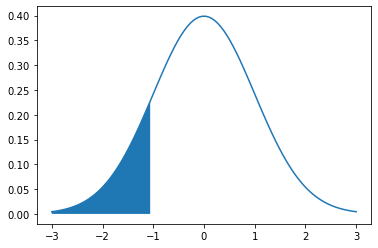

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
Capital = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, x<-Capital)
 
plt.show()
  

## Cadre traditionnel : la probabilité de ruine et le modèle Collectif

#### Le modèle de Cramer Lundberg (modèle collectif)



#### **Modèle de Cramér-Lundberg** : 
> - The claim size process : the claim sizes $(X_{k})$ are positive iid, with $E(X) = \mu$ and $var(X)=\sigma^{2}$ 
 and following distribution function $F$
> -  The claim times : the claims occur at the random instants of time 
> -  The claims arrival process : the number of claims in the interval $[0,t]$ is denoted by 
$$ N(t) = sup\left\{ n\geq 1 : T_{n} \leq t \right\} $$
> - the inter-arrival times $Y$ are iid exponentially distributed with finite mean $ EY = \frac{1}{\lambda}$
> -  the sequences X and Y are independent of each other.
>The risk process U(t) corresponds to the wealth of the company and can be expressed as : 
$$ U(t) = u +ct -S(t) $$
with :
- $u$ the initial capital, $c$ the premium income rate,
- $S(t)$ is the total claim amount process ($\sum X_i$). $\mathbb{E}(S_{t}) = \lambda\mu$

#### **Cramér-Lundberg theorem** :

> Consider the Cramér-Lundberg model including the net profit condition $\rho>0$. Assume that there exists a $R > 0$, called **Adjustment Coefficient**, the solution of the following equation :
$$ 1+(1+\rho)\mu r = m_X(r) $$
 where  $$ m_X(r) = E[   e^{rX} ] $$ 
Then the ruin probability $\psi$,  $\psi(u)=\mathbb{P}^u\{\tau<\infty\}$ can be linked to the initial wealth $u$ : 
 For all $u \geq 0$,  
 

$$\psi(u) \leq e^{-R u} $$
$\rho=\frac{c}{\lambda\mu}-1 $ is called the **safety loading**. 

In the case where the claim sizes are exponentially distributed, this simplifies to 
$$\psi(u) = \frac{\lambda \mu}{c}e^{-\left( \frac{1}{\mu}-\frac{\lambda}{c}\right)u}.$$




Quelques remarques :
- il faut d'abord couvrir le risque en moyenne ($c= \lambda \mu$). c'est le rôle des **provisions** économiques.
- Mais si on n'a que les provisions économiques (et donc pas de marge de sécurité $c=\mu \lambda$), on voit que la probabilité de ruine est égale à 1 . $\psi(u) = e^{0}.$ (mais avec un horizon infini).

C'est *élégant* mais c'est faux :  effets de la dépendance, seasonalité, sinistres non *elliptiques*...
Par ailleurs, les assureurs ont cherché un modèle qui permet d'optimiser le capital (ce sera le modèle de Finetti). Néanmoins, cela nous permet de mieux comprendre comment cela fonctionne : 
- d'abord un modèle simple 
- puis nous essayerons d'intégrer les éléments de complexité comme la dépendance entre risque

# Cas d'un contrat Temporaire décès

## Vision économique

### Les différentes Provisions

| **Provisions techniques**                    | **Pour les assurés ou l'assureur ?**                                                                                                                                                                                                                             |
|----------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **PM**                                       | C’est la dette envers les assurés liée au risque couvert.                                                                      |
| **PGG - Provision globale de gestion**       | frais de gestion futurs                                                                            |

### Calcul de ces provisions sur un cas pratique : Temporaire décès de l'honorable King Fo

## Et maintenant quel capital à mettre en place ?

### Modéliser le risque

#### La centenaire va-t'elle vivre 100 ans ?
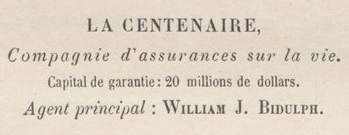


Un rappel des résultats du premier cours sur la probabilité de décès de King Fo : 


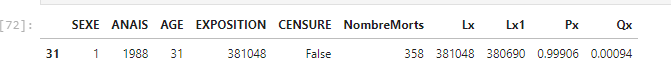

#### Probabilité de Ruine à un an
>  $r_n(K) = \mathbb{P}(S-E(S)+K<0)$ la probabilité de ruine avec le capital $K$ avec $n$ clients. 


In [5]:
#### Méthode 1 : Un générateur aléatoire
 

# Initialisation
import random
import pandas as pd
import seaborn as sns
import numpy as np

def SimulationCapital(NbreAnneeSimulees = 10000,NbreClients = 10000,Qx = 0.00094,CapitalAssure= 200000):
# Paramètres
    # indiquer le nombre de simulations que l'on veut NbreAnneeSimulees
    # nombre de clients NbreClients
    # Probabilité de mourir de King Fo Qx
     # Capital Assuré CapitalAssure
    Provision = CapitalAssure * Qx * NbreClients
   
    df = np.random.rand(NbreAnneeSimulees, NbreClients)
    df = np.where(df<= Qx, - CapitalAssure, 0)

    S = np.sum(df, axis=1)
    SituationFinAnnee = S + Provision 

    sns.displot(SituationFinAnnee)
    print ('Provision   :',Provision)
    print ('n :', NbreClients)
    print ('Quantile 1% : ',np.quantile(SituationFinAnnee, 0.01))
    print ('r(K)',np.sum(np.where(SituationFinAnnee<0,1/NbreAnneeSimulees,0)))

Un seul client à la centenaire

Provision   : 188.0
n : 1
Quantile 1% :  188.0
r(K) 0.0011


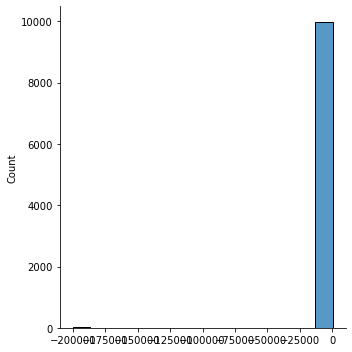

In [6]:
SimulationCapital(NbreClients = 1)

On voit que le risque est tres concentré dans la zone autour de 0, avec quelques années où King Fo meurt et la perte de la compagnie très importante. A noter que le capital pour couvrir le risque centeanire est faible (et même négatif !), puisque le risque que King Fo meurt est inférieur à 1%.

#### et si on augmente le nombre de personnes assurées (le secret de la mutualisation !)

Provision   : 188000.0
n : 1000
Quantile 1% :  -612000.0
r(K) 0.6149000000000002


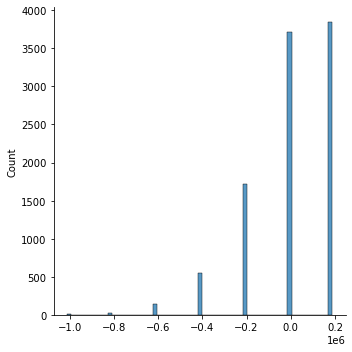

In [7]:
SimulationCapital(NbreClients = 1000)

Provision   : 1880000.0
n : 10000
Quantile 1% :  -1520000.0
r(K) 0.46410000000000007


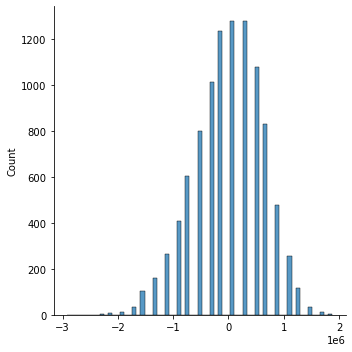

In [8]:
SimulationCapital(NbreClients = 10000)

Provision   : 28000000.0
n : 10000
Quantile 1% :  -5600000.0
r(K) 0.4749000000000001


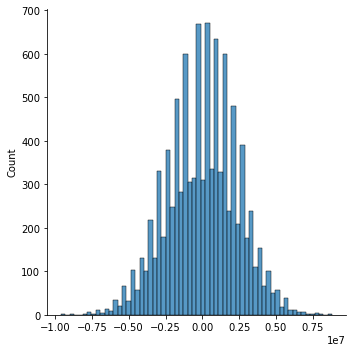

In [9]:
SimulationCapital(NbreClients = 10000,Qx = 0.014)

> Alors qu'on a multiplié le nombre de clients par 10, on n'a besoin de multiplier le capital que par 2,5. 
> quand on augmente la probabilité de mortalité, en passant à la mortalité constatée au XVIII, on voit aussi une plus grande stabilité

#### Méthode 2 : par calcul formel

la méthode par simulation est simple mais peut rapidement devenir très consommatrice en ressource machine (surtout si c'est mal programmé). Il est toujours utile de passer par un calcul formel (je protège ma planète).
Soit :
- $n$ personnes ayant la probabilité de décès au cours de l'année $q_x$.
- on verse le capital assuré $C$ si la personne décède au cours d'année.
- le capital de la société est $K$. il faut donc $k=\frac{K}{C}$ morts la même année pour faire faillite.

Alors la variable aléatoire $\frac{S}{C}$ suit une loi binomiale de paramètres $n$, $q_x$ simplifié $q$ pour ne pas alourdir les notations, c'est à dire : 

$$ \mathbb{P} ( \frac{\sum X_i}{C} = k) = C_n^p q^k (1-q)^{n-k} $$

#### Théorème de Moivre - Laplace (Approximation de la loi binomiale par la loi normale)
On note :
- $\frac{S_n}{C}$  une loi binomiale de paramètres n et p
- $\Phi$ la fonction de répartition de $\mathcal{N}(0,1)$ 


Alors le théorème de Moivre-Laplace (qui anticipe chronologiquement le Théorème Central limite) établit, quand le nombre $n$ de tirages augmente : 

> $$\lim_{n\to\infty}\operatorname{P} \left(\frac{\frac{S_n}{C}- np}{\sqrt{np(1-p)}}\leq t \right) = \Phi(t)$$

En posant $t=\frac{\zeta - np}{\sqrt{np(1-p)}}$ (pour centrer réduire la distribution), on obtient :

> $$\operatorname{P}(\frac{S_n}{C} \le \zeta) \approx\Phi \left(\frac{\zeta - np}{\sqrt{n p(1-p)}} \right)$$




#### Quelques remarques : 
- La loi normale suivie par $\frac{S_n}{C}$ est donc une loi de moyenne  $ m = n. p $ et d'écart type $ \sigma^2 = n p(1-p)$.
- Cette approximation  est bonne en général pour $np(1-p)\ge 10$.


 

#### Application au besoin en capital
On cherche à savoir quand la charge sinistre $S_n$ dépasse la provision ($\mathbb{E}(S_n) = npC$) et consomme le capital $K = kC$,

En utilisant la propriété que $\frac{S_n}{C}$ suit une binomiale n,q et en posant $t=\frac{k}{\sqrt{np(1-p)}}$ (pour  réduire la distribution), et en multipliant par $C \sqrt{np(1-p)}$ on obtient :

> $$ r_n(K) =\operatorname{P}(S_n - np C \le K) \approx\Phi \left(\frac{k }{\sqrt{n p(1-p)}} \right)$$


 

 

#### on le programme ?

mean = 0.94
variance = 0.9391163999999999


,r (nombre de morts),p(k=r),Charge Sin
0,0,0.390455,0.0
1,1,0.367373,0.2
2,2,0.172655,0.4
3,3,0.054041,0.6
4,4,0.012673,0.8
5,5,0.002375,1.0
6,6,0.000371,1.2
7,7,0.000050,1.4


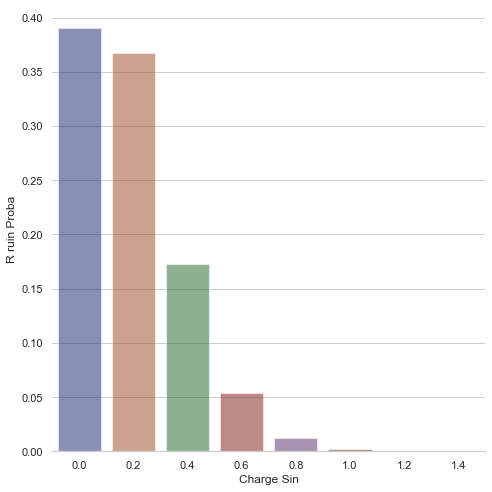

In [10]:
CapitalAssure = 200000
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and q
# def SimulationCapital(NbreAnneeSimulees = 10000,NbreClients = 10000,Qx = 0.00094,CapitalAssure= 20000000):
n = 1000
p = 0.00094
# defining the list of r values
r_values = list(range(8))
mean, var = binom.stats(n, p)
print("mean = "+str(mean))
print("variance = "+str(var))
# obtaining the mean and variance 



# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
df = pd.DataFrame(r_values,columns =['r (nombre de morts)'])
df['p(k=r)'] = pd.DataFrame(dist)
df['Charge Sin'] = df['r (nombre de morts)']* CapitalAssure/1000000
 
# selection uniquement des probabilités significatives
df= df[(df['p(k=r)']>0.00001)]
df.style.format({
    'p(k=r)': '{:,.2%}'.format,
}) 
display(df)
import seaborn as sns
sns.set_theme(style="whitegrid")
 

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Charge Sin", y="p(k=r)", 
   palette="dark", alpha=.5, height=7
)
g.despine(left=True)
g.set_axis_labels("Charge Sin", "R ruin Proba")
 

On voit que la charge sinistre dépasse rarement 1.4 M Euros, à comparer au 20 M de capital.

In [11]:
n_values = list(range(8))
CapitalLaCentenaire = 20000000
NbreMortsMax = CapitalLaCentenaire / CapitalAssure  
print('Capital de la société exprimé en nombre de morts : ', NbreMortsMax)
df2 = pd.DataFrame(n_values,columns =['Nombre de clients (log)'])
df2['n'] = 10**df2['Nombre de clients (log)']
df2['p(k>capital)'] = 1-binom.cdf(NbreMortsMax,
                                   df2['n'], 
                                   p)

Capital de la société exprimé en nombre de morts :  100.0


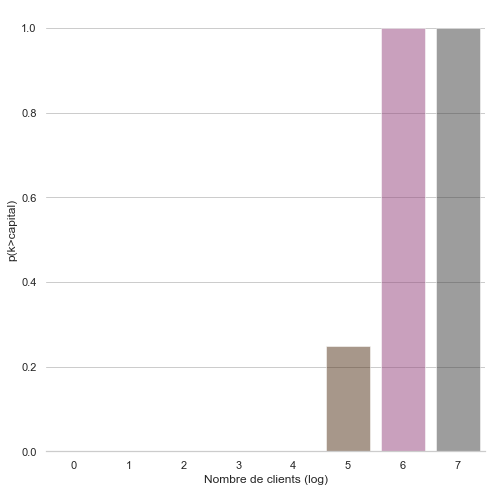

In [12]:
# Draw a nested barplot by species and sex
 
g = sns.catplot(
    data=df2, kind="bar",
    x="Nombre de clients (log)", y="p(k>capital)", 
   palette="dark", alpha=.5, height=7
)
g.despine(left=True)
g.set_axis_labels("Nombre de clients (log)", "p(k>capital)")
 
 

On voit que la probabilité augmente pour devenir 1 à partir de $10^5$ clients mais on a oublié... la prime, qui vient compenser une partie des sinistres.

#### Avec une prime couvrant la prime pure (pas de marge)

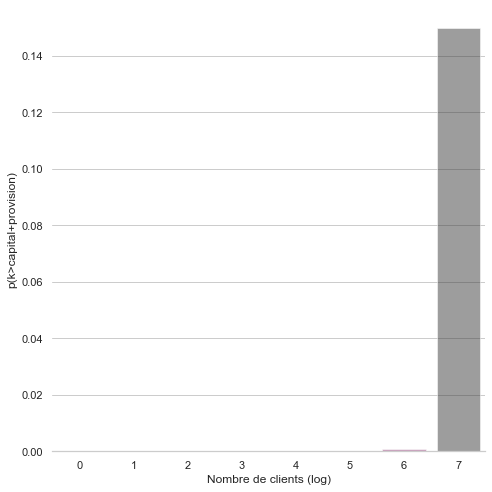

In [13]:
# On rajoute une provision couvrant le sinistre moyen
df2['p(k>capital+provision)'] = 1-binom.cdf(NbreMortsMax+ (df2['n'] * p) ,
                                   df2['n'], 
                                   p)
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df2, kind="bar",
    x="Nombre de clients (log)", y="p(k>capital+provision)", 
   palette="dark", alpha=.5, height=7
)
g.despine(left=True)
g.set_axis_labels("Nombre de clients (log)", "p(k>capital+provision)"  )
 
 

> Le fait d'introduire la provision fait peut évoluer la probabilité de défaut, par la probabilité de mortalité est très faible. En revanche, dès que l'on arrive à $n^6$, la probabilité de ruine augmente certes mais moins vite que sans provision.
*si on augmente le prix de l'assurance, peut on faire descendre la probabilité de ruine  ?*

#### Exercice
Le calculer avec l'approximation normale mentionnée au dessus

### Chargement technique de sécurité $\lambda$

Si on ajoute à la prime $\Pi''$ un chargement de sécurité tel que :
$$\Pi'' = \mathbb{E}(X) (1 + \lambda) = np (1 + \lambda) C $$

On rappelle qu'on a 
> $$\operatorname{P} \left(\frac{\frac{S_n}{C} - np}{\sqrt{np(1-p)}}\leq t \right) \approx \Phi(t)$$

En posant $t=\frac{k}{\sqrt{np(1-p)}} + \frac{\lambda np}{\sqrt{np(1-p)}}$ (pour  réduire la distribution), et en multipliant par $C \sqrt{np(1-p)}$ on obtient :

> $$ r_n(K) =\operatorname{P}(S_n - np C  - \lambda np C \le K ) \approx\Phi \left(\frac{k }{\sqrt{n p(1-p)}} + \frac{\lambda np}{ \sqrt{np(1-p)}} \right)$$


Et la ruine arrive quand le résultat $R =S_n - np C  - \lambda np C $ dépasse le capital $K = C k$.


In [14]:
from scipy.stats import norm

p = 0.00094
#q = 0.006
q = p

Coeflambda = 0.01 # On prend 1% de marge pour les bénéfices 
CapitalLaCentenaire = 1000000
#CapitalLaCentenaire = 0

# moyenne et Variance de la loi normale
k = CapitalLaCentenaire / CapitalAssure  

df2['Terme Capital'] = k /(df2['n'] * q * (1-q))**0.5
df2['Terme Lambda'] = Coeflambda  * (df2['n']* q)**.5 /(1-q)**0.5
df2['k>Capital+Provision (Normal)'] = 1-norm.cdf(df2['Terme Capital']+df2['Terme Lambda'])
pd.options.display.float_format = '{:,.4f}'.format 
display(df2)


,Nombre de clients (log),n,p(k>capital),p(k>capital+provision),Terme Capital,Terme Lambda,k>Capital+Provision (Normal)
0,0,1,0.0000,0.0000,163.1587,0.0003,0.0000
1,1,10,0.0000,0.0000,51.5953,0.0010,0.0000
2,2,100,0.0000,0.0000,16.3159,0.0031,0.0000
3,3,1000,0.0000,0.0000,5.1595,0.0097,0.0000
4,4,10000,0.0000,0.0000,1.6316,0.0307,0.0482
5,5,100000,0.2482,0.0000,0.5160,0.0970,0.2700
6,6,1000000,1.0000,0.0006,0.1632,0.3067,0.3192
7,7,10000000,1.0000,0.1499,0.0516,0.9700,0.1535


#### Propriété : 
> si X est une v.a. suivant une loi normale d’écart type $\sigma$, alors la probabilité de ruine pour le quantile $\alpha$, $n$ clients et une loi de sinistralité $X$
>
> $$ 𝑟_n^X(\alpha) < 0,5 \% ⟺\alpha > 2,576. \sigma $$

#### Exercice
Quel est le capital $K$ pour avoir une proba inférieure à 0.005 si n = 5000

In [34]:
p = 0.00094
n = 5000
Variance = n * p * (1-p)
ET = Variance **0.5
print("Ecart type",ET)
print("moyenne",n* p)
print("ETx2.576", ET*2.576)

Ecart type 2.1669291635861105
moyenne 4.7
ETx2.576 5.582009525397821


Avec 5000 clients, on a $\sigma = 2.1$, soit $r(5.58)<0.05%$. Si on prend $\lambda = 0$, alors $K=kC$, soit 1,2M\$

## l'hypothèse forte d'une va i.i.d. (Titanic, Covid)
L'hypothèse de tous ces modèles, c'est l'indépendance des risques et le fait qu'elle soit identiquement distribuée (on dit aussi homogène) : on appelle cela une variable aléatoire iid (Independent and identically distributed).
Dans la réalité, c'est faux : 
- homogeneité : on peut avoir dans le portefeuille un grand risque, comme l'honorable king fo, qui désequilibre le portefeuille
- indépendance : on peut avoir plusieurs clients dans le titanic. Ou le Covid.

### Pour les risques non homogènes, c'est assez simple
!!! On modélise indépendamment les risques identiques X et Y et on les agrège par tirage aléatoire ou par passage aux fonctions caractéristiques ($\phi_{X+Y}  = \phi_X  \phi_Y$)

### Pour les risques non indépendants : simuler les corrélations entre les risques
Ex : repartons du modèle de Lee Carter calculé dans la partie 3

Rappel : Il s’agit d’une méthode d’extrapolation des tendances passées. La modélisation retenue pour le taux instantané de mortalité est la
suivante :
$$ ln (\mu_{xt}) = \alpha_{x} + \beta_x k_t$$

In [16]:
import pandas as pd
dfLeeCarter = pd.read_pickle("C:/Users/guill/GitHub/RessourcesActuariat/ActuariatVieCNAM/DataActuariat/dataBaseLeeCarter.pkl")
display(dfLeeCarter)

Annee  Age  Sexe      Sx     Qx     EVx    MUx
Annee 0     1977    0     2  100000 0.0110 77.2947 0.0110
      1     1977    1     2   98904 0.0009 77.1456 0.0009
      2     1977    2     2   98816 0.0006 76.2142 0.0006
      3     1977    3     2   98759 0.0005 75.2578 0.0005
      4     1977    4     2   98714 0.0003 74.2914 0.0004
...          ...  ...   ...     ...    ...     ...    ...
Age   100   2019  100     1    1412 0.3383  2.7162 0.4130
      101   2019  101     1     934 0.3441  2.8493 0.4217
      102   2019  102     1     613 0.3646  3.0816 0.4535
      103   2019  103     1     389 0.3336  3.5631 0.4058
      104   2019  104     1     260 0.2562  4.0963 0.2960

[8642 rows x 7 columns]

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# module imports

from formulaic import model_matrix # permet d'utiliser des formules comme dans R
 


In [18]:
# Fonction permettant de grapher en scatter plot un ou deux graphes
def GraphiqueTaux(data,x1,y1,y2=None,y3=None,titre=None,Varhue=None):
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.scatterplot(data=data,x=x1, y=y1,
                hue=Varhue,      
                palette="ch:r=-.2,d=.3_r" ,label=y1,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y2 is not None:
        sns.scatterplot(data=data,x=x1, y=y2,    hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y2,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y3 is not None:
        sns.scatterplot(data=data,x=x1, y=y3,   hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y3,
                sizes=(1, 8), linewidth=0,
                  ax=ax)    
    ax.set_title(titre)
    ax.legend()     
    ax.set_yscale('log')
def CalculGLMGraph(dataEntree,formula,dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),monOffset=None,ImpressionInfluence=False,
                   VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = dataEntree.copy()
        y, X = model_matrix(formula,df) 

        # GLM proprement dite
        Result= sm.GLM(endog=y,exog=X,family=dist(link=Fonctionlien),offset=monOffset).fit()
        display(Result.summary())
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=df[VarY], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        df[VarPredict] = Result.predict(X,offset=monOffset)        
        GraphiqueTaux(data=df,x1=VarXGraph,y1=VarY,y2=VarPredict,Varhue=VarXGraphCateg,titre=titre)
        return Result 
    
from statsmodels.gam.api import GLMGam, BSplines
def CalculGAMGraph(y,X,
                   dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),ImpressionInfluence=False,
                   VarXGraph='AGE',VarXGraphCateg='SEXE', VarXSpline='AGE',monOffset=None,
                   VarPredict='MUxHat', 
                   titre='Comparaison entre Mux observé et MUx Estimé',      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = X
        y = y
        X = X
        x_spline = X[VarXSpline]
        bs = BSplines(x_spline, df=[6], degree=[3])
     
        # penalization afin de ne pas surapprendre 
        alpha = np.array([0.5])
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha)
    
        Result = model.fit()
    
        # optimisation de l'hyper parametre alpha par méthode des kfold
        alpha_cv = model.select_penweight_kfold()[0]
        print("Alpha",alpha_cv)
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha_cv)
        Result = model.fit()
        display(Result.summary())
        # Partial Regression Plots
        
        fig = sm.graphics.plot_partregress_grid(Result)
        plt.show()
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=y, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        #df[VarPredict] = Result.predict(X,offset=monOffset)   
        df['y']=y
        
        df['yhat'] =Result.get_prediction().predicted_mean
  
        GraphiqueTaux(data=df,x1=VarXGraph,y1='y',y2='yhat',titre=titre)
        return Result

Alpha (1.0,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                 4321
Model:                         GLMGam   Df Residuals:                  4314.02
Model Family:                Binomial   Df Model:                         5.98
Link Function:                  logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -432.71
Date:                Fri, 27 May 2022   Deviance:                       3.2962
Time:                        10:59:58   Pearson chi2:                     3.41
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1365
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3748     12.183      2.001      0.045       0.497      48.252
Age            0.0481      0.024      1.969      0.049       0.000       0.096
Annee         -0.0152      0.006     -2.522      0.012      -0.027      -0.003
Age_s0        -3.6953      3.850     -0.960      0.337     -11.241       3.851
Age_s1        -1.3370      1.632     -0.819      0.413      -4.535       1.861
Age_s2        -1.5701      0.877     -1.791      0.073      -3.289       0.148
Age_s3         0.5724      0.649      0.883      0.377      -0.699       1.844
Age_s4         1.3344      0.640      2.086      0.037       0.080       2.589
==============================================================================
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


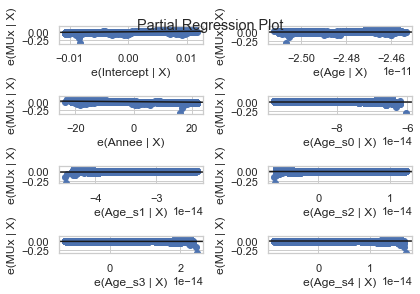

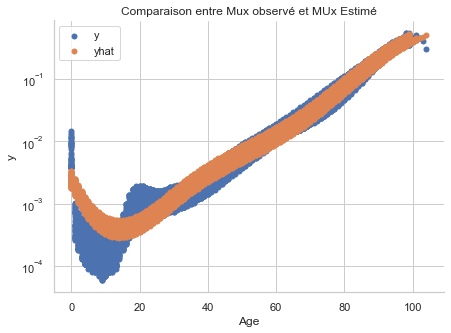

In [19]:
formula = 'MUx  ~  Age + Annee'
df=       dfLeeCarter[(dfLeeCarter['Sexe']==1)] 
y, X = model_matrix(formula,df) 
X
ResultsGAM = CalculGAMGraph(y=y,
        X=X,
        VarXSpline=['Age'],
        VarXGraph ='Age',
        VarPredict='MUxHatspline',  
        titre='Comparaison entre Mux observé et MUx Estimé',     
        dist=sm.families.Binomial,Fonctionlien=sm.families.links.logit(), ImpressionInfluence=False) 

#### modéliser l'incertitude de Lee Carter
https://www.sagepub.com/sites/default/files/upm-binaries/57233_Chapter_6.pdf


In [20]:
d = {'Annee': [2020], 'Age': [31],'Sexe' :[1]}
dfLeeCarterPred = pd.DataFrame(data=d)
x_spline = dfLeeCarterPred['Age']
bs = BSplines(x_spline, df=[6], degree=[3])
     
# penalization afin de ne pas surapprendre 
alpha = np.array([0.5])

dfLeeCarterSimu = ResultsGAM.get_prediction()


In [21]:
# On calcule MuX avec un intervalle de confiance de 0.5%
pd.options.mode.chained_assignment = None  # default='warn'
df['ResultsMuMean']=dfLeeCarterSimu.summary_frame()['mean']
df['ResultsMuMax']=dfLeeCarterSimu.summary_frame(alpha=0.005)['mean_ci_upper']
display(df[(df['Age']==31)&(df['Annee']==2019)])

,,Annee,Age,Sexe,Sx,Qx,EVx,MUx,ResultsMuMean,ResultsMuMax
Age,31,2019,31,1,98583,0.0008,49.5132,0.0008,0.0010,0.0076


#### Resimulons le risque en prenant ce scenario
On a prévu comme capital : 
    

In [22]:
CapitalLaCentenaire = 20000000
p = 0.00094
p_reel = 0.007599
n = 100000
 
df2['Provision'] = p * CapitalAssure * df2['n'] 
df2['Marge'] = p * CapitalAssure * df2['n'] * Coeflambda

df2['ResultatPctCapital'] = (-(p_reel * CapitalAssure * df2['n']) + df2['Provision'] +df2['Marge']) /CapitalLaCentenaire
#Calcul de la perte comme un pourcentage du capital
pd.options.display.float_format = '{:,.2f}'.format 
display(df2)

,Nombre de clients (log),n,p(k>capital),p(k>capital+provision),Terme Capital,Terme Lambda,k>Capital+Provision (Normal),Provision,Marge,ResultatPctCapital
0,0,1,0.00,0.00,163.16,0.00,0.00,188.00,1.88,-0.00
1,1,10,0.00,0.00,51.60,0.00,0.00,"1,880.00",18.80,-0.00
2,2,100,0.00,0.00,16.32,0.00,0.00,"18,800.00",188.00,-0.01
3,3,1000,0.00,0.00,5.16,0.01,0.00,"188,000.00","1,880.00",-0.07
4,4,10000,0.00,0.00,1.63,0.03,0.05,"1,880,000.00","18,800.00",-0.66
5,5,100000,0.25,0.00,0.52,0.10,0.27,"18,800,000.00","188,000.00",-6.65
6,6,1000000,1.00,0.00,0.16,0.31,0.32,"188,000,000.00","1,880,000.00",-66.50
7,7,10000000,1.00,0.15,0.05,0.97,0.15,"1,880,000,000.00","18,800,000.00",-664.96


- On voit que pour les petits portefeuilles (jusqu'à 1000), le risque d'un "choc" de mortalité est encore limité mais explose pour devenir un multiple du Capital (ex : 85 fois le capital si on a 1000 000 d'individus). Alors que la probabilité prise est certes élevée (0.76% soit x 8 par rapport à la probabilité actuelle) mais bien inférieure à celle de la table de Duvillars (1.4%). 
- Alors que le risque lié au risque lié à la survenance **indépendante** de plusieurs morts a tendance à diminuer avec la taille du portefeuille, surtout avec une marge de sécurité.

#### Limites de l'approche
- tout d'abord, le modèle de Lee-Carter est un modèle simple : toute l'amélioration de l'espérance de vie est traduite dans un paramètre $k_t$. Ce qui entraine une faible adhérence aux données et donc une erreur importante.
- prendre un modèle plus complexe permet de réduire l'erreur et donc de projeter moins de volatilité dans la simulation. A l'inverse, un modèle complexe peut très bien *adhérer* aux données empiriques mais, du fait d'un surapprentissage, présenter un faible effet prédictif.
- Si on veut projeter sur plusieurs années, on utilisera plutot un modèle ARIMA.
- Utilisation de **modèles** : passage d'un modèle purement statistique à un modèle plus explicatif : modèle SIR, SEIR, catastrophe... 

#### Une difficulté à tout modèle de risque : l'impossibilité de réfutation 
La plupart des modèles de risque prévoit la possibilité de tout évènement stochastique mais appliquent à chaque évènement une probabilité différente. Comment réfuter de tels modèles en fonction de l'expérience ? Après le Covid, un modèle qui a prévu une mortalité du covid mais uniquement tous les 2000 ans est il non valable ?

 ### Pour limiter les risques, l'utilisation de la réassurance
 
Un assureur dispose d'une alternative au capital, la réassurance, c'est à dire la cession des risques à un réassureur.
Il existe plusieurs formes de réassurance : 
- Quote-Part, une cession proportionnelle de toutes les primes et de tous les sinistres, en contrepartie d'une commission. Cette structure est adaptée pour céder tous les types de risques (en particulier déviation de mortalité)
- Excédent de plein (Anglais : surplus) : en cas de portefeuille non homogène, cession des capitaux assurés les plus importants
- Pour les risques de pandémie et catastrophe, il existe des couvertures non proportionnelles qui couvrent uniquement ces risques mais qui peuvent poser des difficultés en assurance vie de définition. 

#### Exercice de réassurance proportionnelle

Un assureur cède en Quote-part $\pi$ et conserve $1 - \pi$ de toutes les primes et sinistres.
Comment évolue la probabilité de ruine, exprimée en fonction de la loi normale ?
Si la cession est de 50%, trouver le montant de fonds propre requis.

# cadre légal : Solvency II


la commission européenne a entrepris des travaux considérables
pour réformer en profondeur la réglementation prudentielle du secteur de l'assurance et de la
réassurance dans l’espace économique européen. Ces travaux ont abouti au printemps 2009 à
l'adoption, par le Conseil et le Parlement européens, d'une directive cadre nommée Directive
Solvabilité 2 (Directive 2009/138/CE). Modifiée et complétée en avril 2014 par la Directive
Omnibus 2, la Directive Solvabilité 2 a été transposée en droit français le 2 avril 2015
(Ordonnance n° 2015-378) et finalement entrée en vigueur le 1er janvier 2016. 


https://www.institutdesactuaires.com/docs/mem/be970145ac02345d7762d06497360a3f.pdf

### SCR



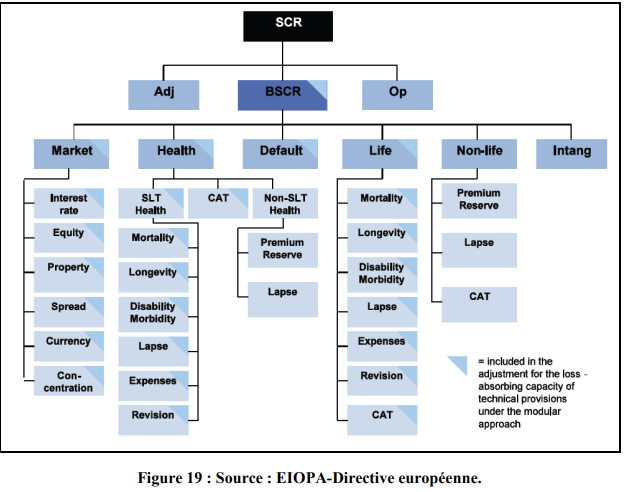

La formule standard de calcul du SCR se résume ainsi :
$$ SCR = BSCR + Op + Adj $$
Où :
- BSCR est le SCR de base
- Op est l'exigence de capital pour couvrir le risque opérationnel
- Adj est et l'ajustement visant à tenir compte de la capacité d'absorption des pertes par les mécanismes de participation aux bénéfices et par les impôts différés 

À partir du schéma ci-dessus, nous observons que le BSCR est composé de 6 modules de
risques :
- le module risque de marché (Market) ;
- le module risque de souscription en Santé (Health) ;
- le module risque de contrepartie (Default) ;
- le module risque de souscription en Vie (Life) ;
- le module risque de souscription en Non-Vie (Non-life) ;
- le module risque sur actifs incorporels (Intangible).

#### Rappel Propriété : 
> si X est une v.a. suivant une loi normale d’écart type $\sigma$, alors la probabilité de ruine pour le quantile $K$, $n$ clients et une loi de sinistralité $X$
>
> $$ 𝑟_n^X(K) < 0,5 \% ⟺K > 2,576. \sigma $$

On veut calculer le Capital Economique $K$ correspondant à ce risque de ruine 0.5%, en tenant compte de la marge de sécurité $\lambda$. On pose $ m =\mathbb{E}(X)$

In [23]:
p = 0.00094

#q = 0.006
q = p
Coeflambda = 0.01
n = 500000
CapitalAssuree = 200000

m = CapitalAssuree * n * p
ET = CapitalAssuree * (n * p * (1-p))**0.5

CapitalEconomique200 = 2.576 * ET - Coeflambda * m

print("Capital Economique 200 ans / 0.5%","{:.0f}".format(CapitalEconomique200) )


Capital Economique 200 ans / 0.5% 10224019


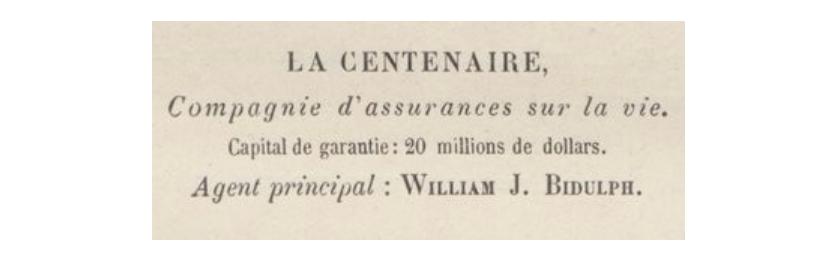

In [24]:
CapitalLaCentenaire = 20000000
RatioSolvabilite  = CapitalLaCentenaire/CapitalEconomique200
print("Couverture de solvabilité :","{:.0%}".format(RatioSolvabilite) )

Couverture de solvabilité : 196%


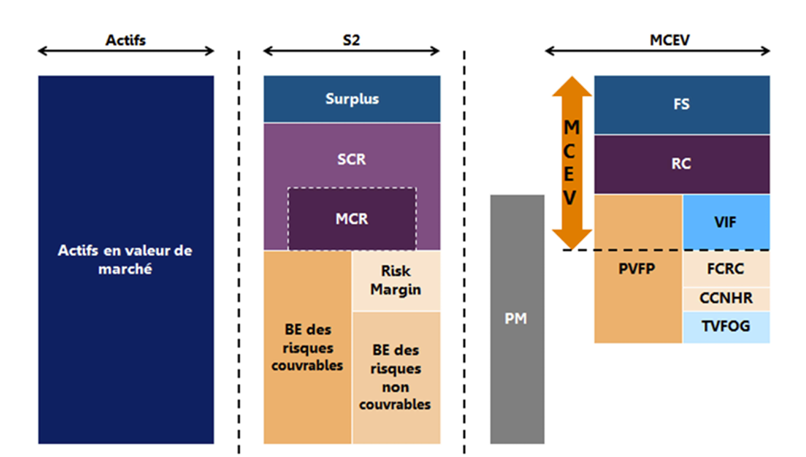
[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.pericles-group.com%2Fwp-content%2Fuploads%2F2016%2F11%2Fceipa110_modelmcev_enbrefquelquesrappelsconcernantlamcev.pdf&psig=AOvVaw2eK4gYGcroKNck68GKxAWv&ust=1653382157820000&source=images&cd=vfe&ved=0CA0QjhxqFwoTCLD9-N2e9fcCFQAAAAAdAAAAABAD)

#### D'abord un bilan "économique"
Les provisions Solvency II sont sur base dite économique. Mais autant une vision économique est "unique" en cas de marché liquide, autant les risques d'assurance sont peu liquides, et la définition économique = Marché, pas toujours évidente à calibrer.
$$PM_{Solvency II} = PM_{Best Estimate} + Marge$$


#### PM Best Estimate
Best estimate = VAP(flux futurs)-VAP(primes futures) avec :
- Actualisation : utiliser des courbes de taux
- Probabilités : tenir compte des lois de rachats (conjoncturels/structurels) et ajustement des lois de survie (table vie et table décès)

#### Marge de risque :
La marge (Risk Margin RM) est "calibrée" pour correspondre à ce que le "marché"(par exemple les réassureurs) exigerait pour prendre le risque. 

-  Taux $r_{CoC}$ fixé à 6%
- alors 
$$ RM = r_{CoC} x \sum_{t=0}^{T-1} \frac{SCR(t)}{(1+r(t+1))^{t+1}}$$

### Calcul du SCR de base : la VaR à 99.5% du risque

En théorie, si on a une distribution normale, on peut appliquer $SCR = 2.576 \sigma$ du risque.
Avec plusieurs risques,
- on calcule le SCR de chaque risque $i$
- on calcule la matrice de corrélation $corr_{i,j}$ comme si tous les risques étaient normaux
- puis, on agrège : 
    $$ SCR_{base} = \sqrt{\sum corr_{i,j} x SCR_i x SCR_j} $$
 


#### Pratiquement pour le risque de mortalité
> 1. The mortality risk stress referred to in Article 77b(1)(f) of Directive 2009/138/EC shall be the more adverse of the following two scenarios in terms of its impact on basic own funds:
>>(a) an instantaneous permanent increase of 15 % in the mortality rates used for the calculation of the best estimate;
>>
>>(b) an instantaneous increase of 0.15 percentage points in the mortality rates (expressed as percentages) which are used in the calculation of technical provisions to reflect the mortality experience in the following 12 months.


[source EIOPA](https://www.eiopa.europa.eu/rulebook/solvency-ii/article-6390_en)

In [25]:
SCRStandarda = (CapitalAssuree * n * p) * .15
SCRStandardb = (CapitalAssuree * n * (p+0.0015))
SCRStandard = max(SCRStandarda,SCRStandardb)
print("Capital Economique Standard ","{:.0f}".format(SCRStandard) )

Capital Economique Standard  244000000


On voir que le risque standard est plus faible que le risque modélisé par notre modèle mais dans le même ordre de grandeur.

### Et pour la prochaine fois ?
- Solvency II : comment on gère les risques financiers.
- formule standard et simulation.


# Annexe

- Solvabilité
- ruine
- volat implicite
- évenement
https://www.institutdesactuaires.com/se-documenter/supports-des-presentations/presentations-de-memoires-134 : plusieurs mémoires

- S'inspire : Solvabilité – Fonction de ruine - Ulrich Tan - Lundi 18 mai 2020 
